In [1]:
import numpy as np
%pylab inline

def to_pattern(letter): ### Turn X and dots to single array as with values {-1,1}
    return np.array([+1 if c=='X' else -1 for c in letter.replace('\n','')])

def display(pattern):   ###Grid Display Function
    from pylab import imshow, cm, show
    imshow(pattern.reshape((10,10)),cmap=cm.binary, interpolation='nearest')
    show()

def weight(patterns):    ###Training Function
     
    r,c = patterns.shape
    W = np.random.normal(0, 1, 10000) ## Initialization with Gaussian Distribution
    W = W.reshape(100,100)    
    for p in patterns:
        W = W + np.outer(p,p)
        W[np.diag_indices(c)] = 0 ## Make diagonal indices zero
    return W

def iterate(W, patterns): ### Noisy patterns * Weight matrix
    hard_linearity = np.vectorize(lambda x: -1 if x<0 else +1)
    for i in range(10):
        k=0
        patterns = hard_linearity(np.dot(patterns,W))
        for p in patterns:
            k=k+1
            print("Iteration %d for Number %d:" % (i+1,k))
            display(p)
    return patterns


Populating the interactive namespace from numpy and matplotlib


In [2]:
one = """
...XXX....
..XXXX....
.XX.XX....
....XX....
....XX....
....XX....
....XX....
....XX....
....XX....
..XXXXXX..
"""
two = """
..XXXXXX..
.XX....XX.
.......XX.
......XX..
.....XX...
....XX....
...XX.....
..XX......
.XX.......
.XXXXXXXX.
"""
three = """
XXXXXXXXXX
XXXXXXXXXX
XXXXXXXXXX
.......XXX
...XXXXXXX
...XXXXXXX
.......XXX
.......XXX
XXXXXXXXXX
XXXXXXXXXX
"""
four = """

......XXX.
.....XXXX.
....XX.XX.
...XX..XX.
..XX...XX.
.XX....XX.
XX.....XX.
XXXXXXXXX.
.......XX.
.......XX.
"""
five = """
XXXXXXXXXX
XX........
XX........
XX........
XX........
XXXXXXXXXX
........XX
........XX
........XX
XXXXXXXXXX
"""




In [3]:
ones = to_pattern(one)
twos = to_pattern(two)
threes = to_pattern(three)
fours = to_pattern(four)
fives = to_pattern(five)

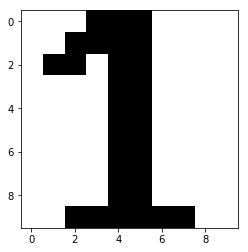

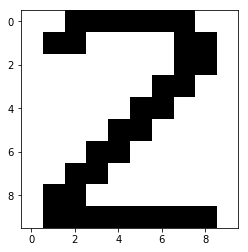

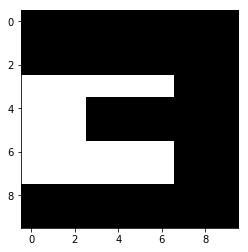

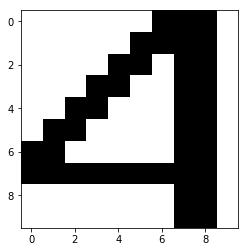

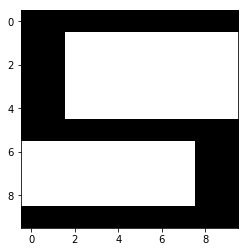

In [4]:
display(ones)
display(twos)
display(threes)
display(fours)
display(fives)

In [5]:
mean, std = 0, 2

noise = np.random.normal(mean, std, 100) 

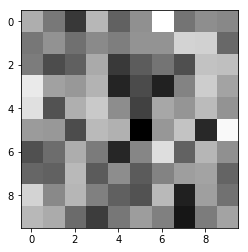

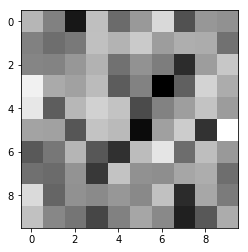

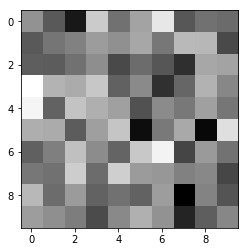

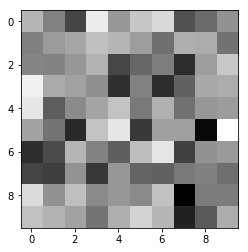

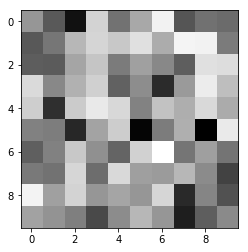

In [6]:
display(ones + noise)
display(twos + noise)
display(threes + noise)
display(fours + noise)
display(fives + noise)

In [7]:
patterns = np.array([ones,twos,threes,fours,fives])

In [8]:
patterns.shape

(5, 100)

In [9]:
W = weight(patterns)
W

array([[ 0.        ,  7.1260513 ,  4.24340572, ..., -1.39866583,
         0.0371655 ,  4.17908736],
       [ 5.51567632,  0.        ,  3.09275119, ..., -0.16376492,
         0.39953373,  4.81721925],
       [ 3.84123103,  3.62747249,  0.        , ...,  1.4866477 ,
         4.16013073,  4.11644008],
       ...,
       [-2.25670389, -0.43290205,  0.53612765, ...,  0.        ,
         3.07111875, -2.1835466 ],
       [ 1.45090395,  2.70256203,  2.27792339, ...,  1.73128384,
         0.        ,  1.7335632 ],
       [ 4.16127905,  4.65191998,  3.61214415, ..., -1.19495361,
         1.40592048,  0.        ]])

In [10]:
W.shape

(100, 100)

In [11]:
noisy_patterns = np.array([ones+noise,twos+noise,threes+noise,fours+noise,fives+noise])

Iteration 1 for Number 1:


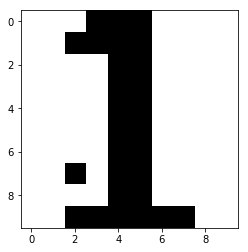

Iteration 1 for Number 2:


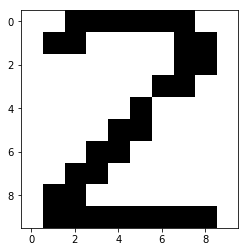

Iteration 1 for Number 3:


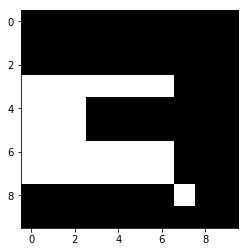

Iteration 1 for Number 4:


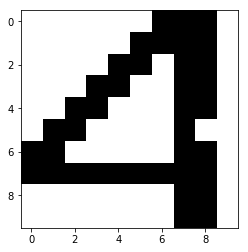

Iteration 1 for Number 5:


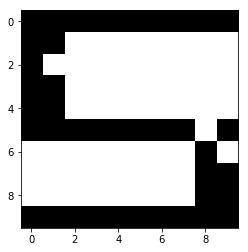

Iteration 2 for Number 1:


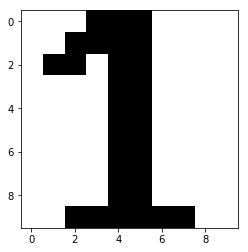

Iteration 2 for Number 2:


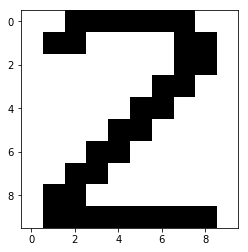

Iteration 2 for Number 3:


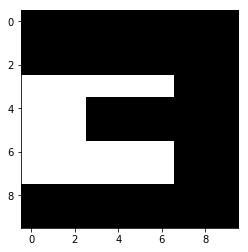

Iteration 2 for Number 4:


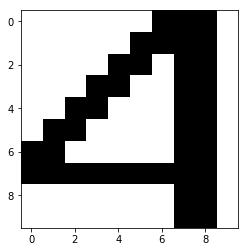

Iteration 2 for Number 5:


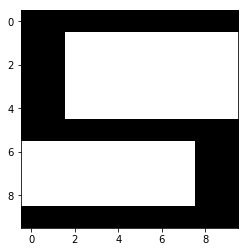

Iteration 3 for Number 1:


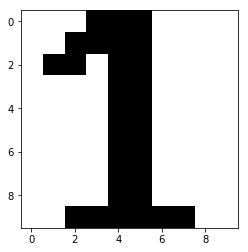

Iteration 3 for Number 2:


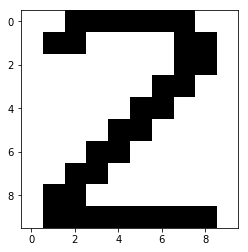

Iteration 3 for Number 3:


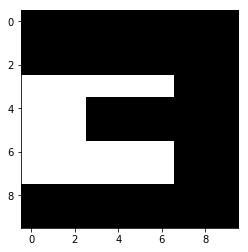

Iteration 3 for Number 4:


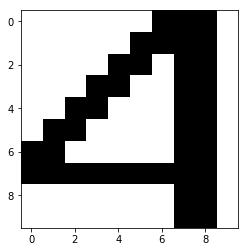

Iteration 3 for Number 5:


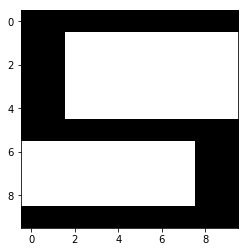

Iteration 4 for Number 1:


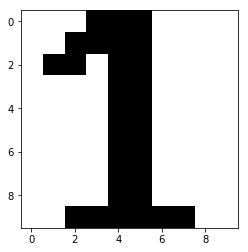

Iteration 4 for Number 2:


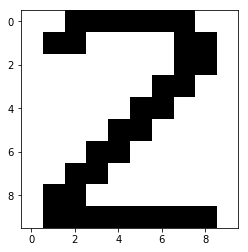

Iteration 4 for Number 3:


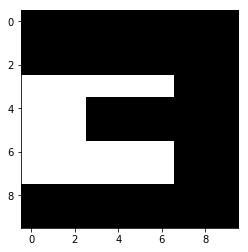

Iteration 4 for Number 4:


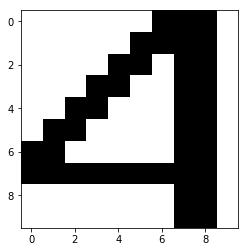

Iteration 4 for Number 5:


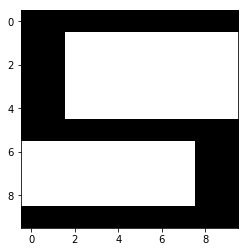

Iteration 5 for Number 1:


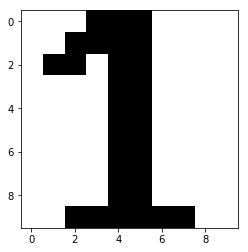

Iteration 5 for Number 2:


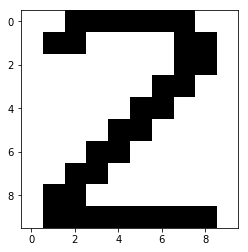

Iteration 5 for Number 3:


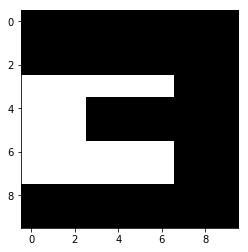

Iteration 5 for Number 4:


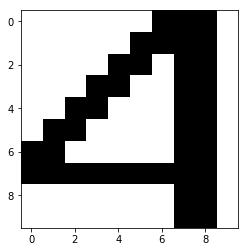

Iteration 5 for Number 5:


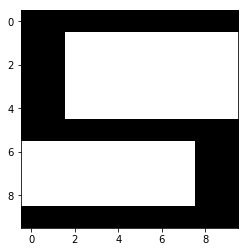

Iteration 6 for Number 1:


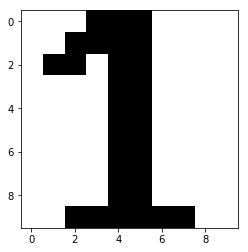

Iteration 6 for Number 2:


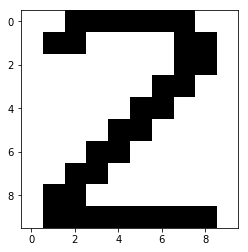

Iteration 6 for Number 3:


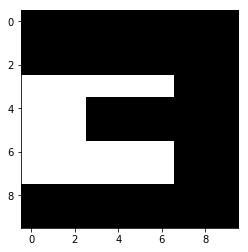

Iteration 6 for Number 4:


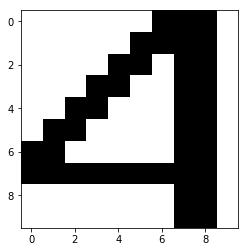

Iteration 6 for Number 5:


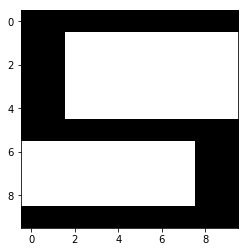

Iteration 7 for Number 1:


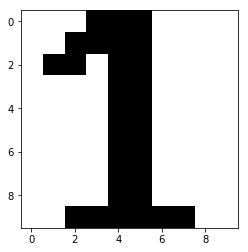

Iteration 7 for Number 2:


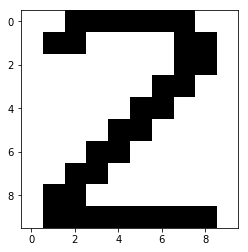

Iteration 7 for Number 3:


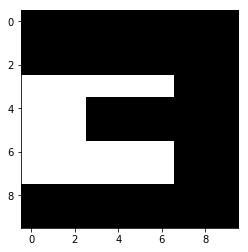

Iteration 7 for Number 4:


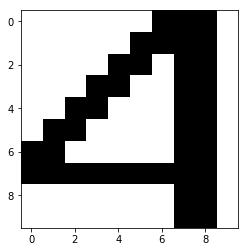

Iteration 7 for Number 5:


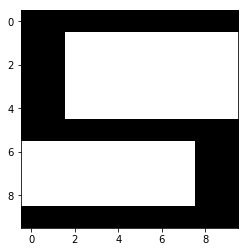

Iteration 8 for Number 1:


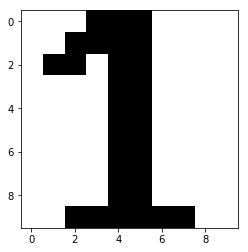

Iteration 8 for Number 2:


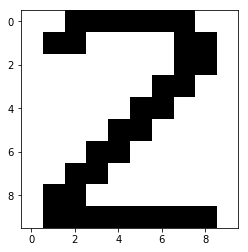

Iteration 8 for Number 3:


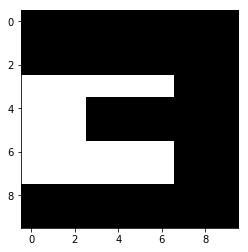

Iteration 8 for Number 4:


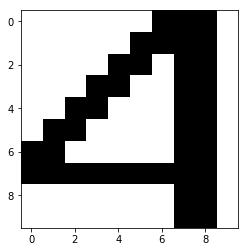

Iteration 8 for Number 5:


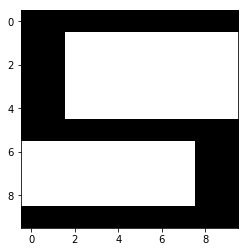

Iteration 9 for Number 1:


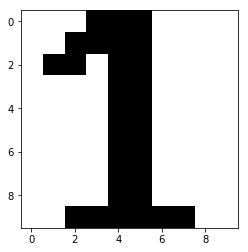

Iteration 9 for Number 2:


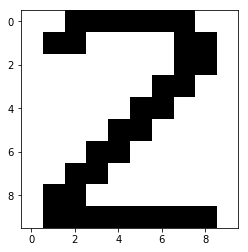

Iteration 9 for Number 3:


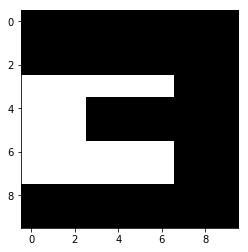

Iteration 9 for Number 4:


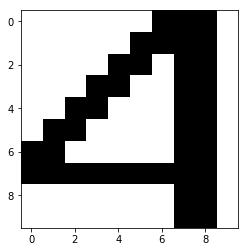

Iteration 9 for Number 5:


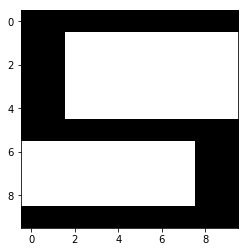

Iteration 10 for Number 1:


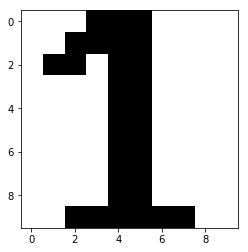

Iteration 10 for Number 2:


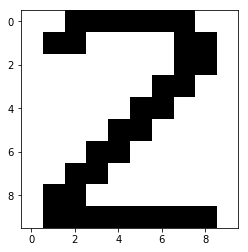

Iteration 10 for Number 3:


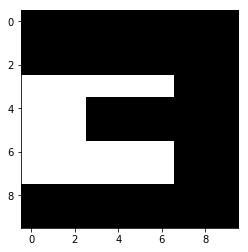

Iteration 10 for Number 4:


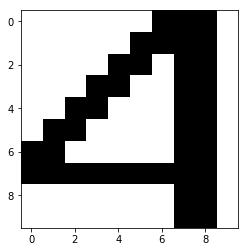

Iteration 10 for Number 5:


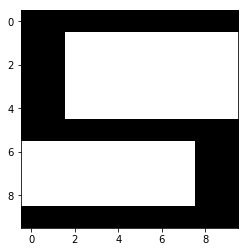

In [12]:
p_list = iterate(W,noisy_patterns)


Final results:


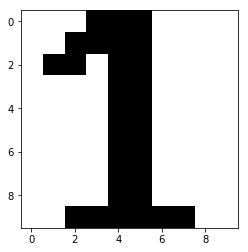

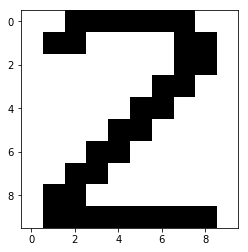

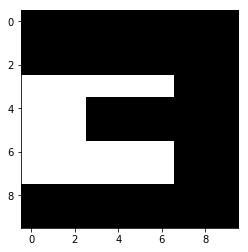

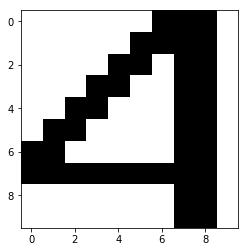

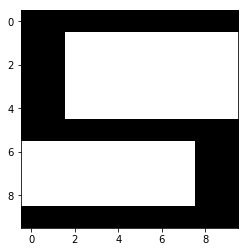

In [13]:
print("Final results:")
for i in p_list:
    display(i)